In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

da = pd.read_csv("data/nhanes_2015_2016.csv")

In [3]:
def plot_bpsy1_diff(da,sample_size, samples):
    sbp_diff = np.empty(shape=[samples],dtype=float)

    for i in range(samples):
        random_sample = da.sample(sample_size*2)
        sbp_diff[i] = random_sample.iloc[0:sample_size,:].BPXSY1.mean() - random_sample.iloc[sample_size:,:].BPXSY1.mean()
        
    return sbp_diff

count    1000.000000
mean        0.017216
std         2.701312
min        -7.573582
25%        -1.890553
50%        -0.017901
75%         1.875162
max         9.607469
dtype: float64

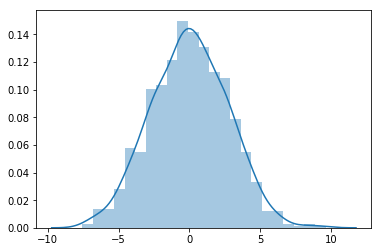

In [4]:
sample_size = 100
samples = 1000
sbp_diff = plot_bpsy1_diff(da,sample_size,samples)
sns.distplot(sbp_diff)
pd.Series(sbp_diff).describe()

count    1000.000000
mean       -0.054100
std         1.377643
min        -4.526198
25%        -1.045184
50%        -0.033225
75%         0.825086
max         3.770119
dtype: float64

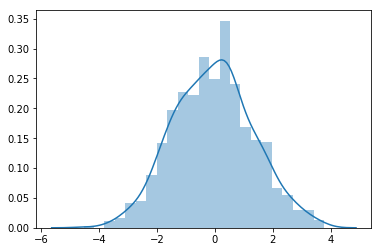

In [5]:
sample_size = 400
samples = 1000
sbp_diff = plot_bpsy1_diff(da,sample_size,samples)
sns.distplot(sbp_diff)
pd.Series(sbp_diff).describe()

In [12]:
from scipy.stats.stats import pearsonr
def plot_bpsy1_corrcoeff_diff(da,sample_size, samples):
    sbp_diff = []
    for i in range(samples):
        random_sample = da.sample(sample_size*2)
        sample1 = random_sample.iloc[:sample_size,:]
        sample2 = random_sample.iloc[sample_size:,:]
        sample1 = sample1.loc[:,["BPXSY1","BPXSY2"]].dropna().T
        sample2 = sample2.loc[:,["BPXSY1","BPXSY2"]].dropna().T
        sbp_diff.append(np.corrcoef(sample1)[0][1] - np.corrcoef(sample2)[0][1])
        
    return sbp_diff

In [13]:
sample_size = 100
samples = 1000
sbp_diff = plot_bpsy1_corrcoeff_diff(da,sample_size,samples)
print("sample size=%d" % sample_size, np.std(sbp_diff), np.sqrt(2 / sample_size)) 

sample size=100 0.014899586453069328 0.1414213562373095


In [14]:
sample_size = 400
samples = 1000
sbp_diff = plot_bpsy1_corrcoeff_diff(da,sample_size,samples)
print("sample size=%d" % sample_size, np.std(sbp_diff), np.sqrt(2 / sample_size)) 

sample size=400 0.007043830744159363 0.07071067811865475


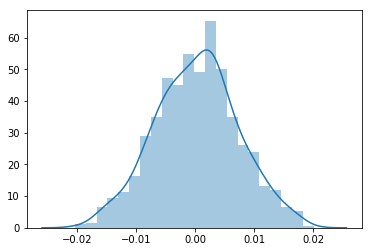

In [16]:
sns.distplot(sbp_diff)

In [10]:
sbp_diff[0][0][1]

0.0001797919347333865

In [23]:
import numpy as np
np.random.seed(123)
sample = np.random.normal(loc=100, scale=1,size=3)
print(sample)

[ 98.9143694  100.99734545 100.2829785 ]


In [33]:
import numpy as np
np.random.seed(123)
population = [unit for unit in range(1,100+1)]
np.random.choice(population,10)

array([67, 93, 99, 18, 84, 58, 87, 98, 97, 48])

In [31]:
np.random.choice(population,10)

array([67, 93, 99, 18, 84, 58, 87, 98, 97, 48])

In [32]:
np.random.choice(population,10)

array([74, 33, 47, 97, 26, 84, 79, 37, 97, 81])

In [2]:
df = pd.DataFrame({'c':[2,4]})

In [3]:
df

,c
0,2
1,4


In [4]:
df.describe()

,c
count,2.000000
mean,3.000000
std,1.414214
min,2.000000
25%,2.500000
50%,3.000000
75%,3.500000
max,4.000000


In [5]:
np.sqrt(2)

1.4142135623730951